# 회귀분석 과제 2

    아래와 같이 분석에 필요한 기본적인 세팅을 한다.

In [352]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [353]:
plt.style.use('seaborn')
plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [354]:
df = pd.read_csv("assignment2_train-data.csv", encoding = 'cp949')

## Data
    분석에 사용할 데이터는 아래와 같고, 각 변수가 의미하는 바는 이렇다.
    
    * Price : The price of the used car in INR Lakhs.
    * Name : The brand and model of the car
    * Location : The location in which the car is being sold or is available for purchase.
    * Year : The year or edition of the model.
    * Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
    * Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
    * Transmission : The type of transmission used by the car. (Automatic / Manual)
    * Owner_Type : Whether the ownership is Firsthand, Second hand or other.
    * Mileage : The standard mileage offered by the car company in kmpl or km/kg
    * Engine : The displacement volume of the engine in CC.
    * Power : The maximum power of the engine in bhp.
    * Seats : The number of seats in the car.
    * New_Price : The price of a new car of the same model.

## 데이터 전처리 및 EDA

In [355]:
# 간략하게 데이터를 확인해본다.
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [356]:
df.shape

(6019, 14)

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [358]:
#데이터의 결측치 확인
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [359]:
# 데이터 이상치 확인을 위한 것
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


상관관계를 대략적으로 확인하기 위해 pairplot을 확인해본다. 연속변수들만 뽑아냈음에도 불구하고 큰 관계가 있어보이진 않는다.

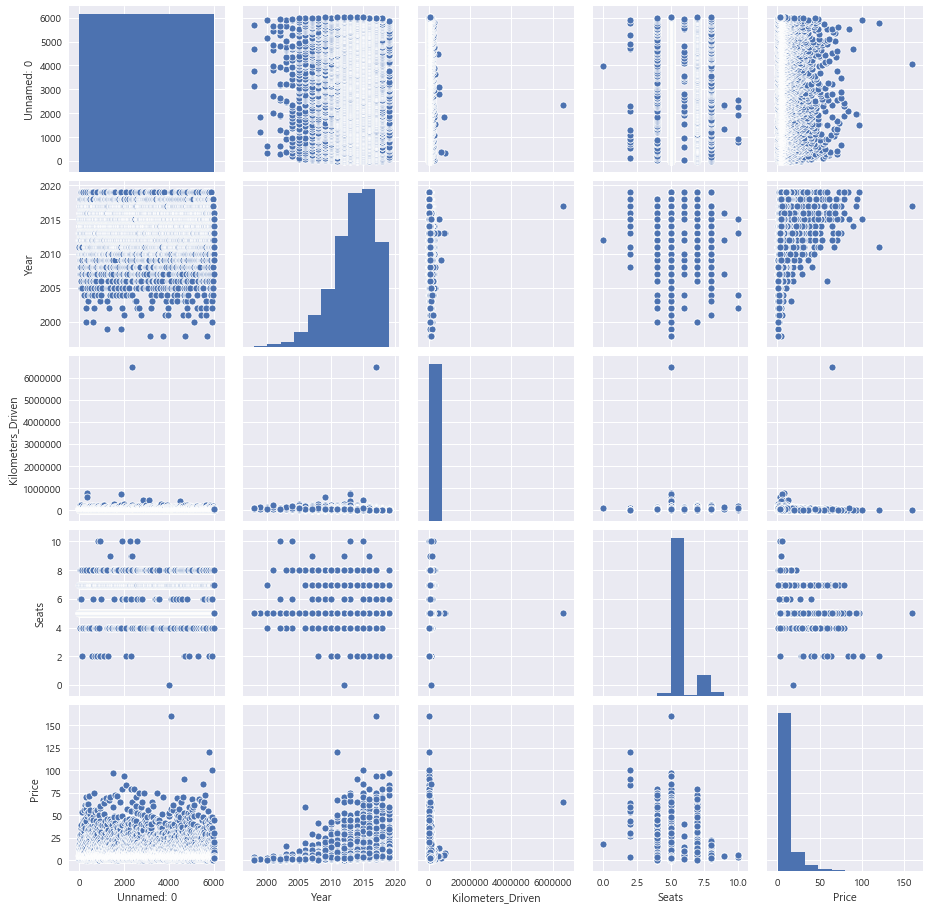

In [360]:
sns.pairplot(df)

    극단적인 이상치가 존재하는 것으로 보인다. 이는 분석에 있어서 좋은 영향을 주지 못하므로 제거하기로 한다. 또한 New_Price의 경우, 결측치가 대부분인 변수이다. 분석에 있어서 의미가 없을 것으로 예상되므로 제거한다.

In [361]:
df=df.drop('New_Price',1)
idx1 = df[df["Kilometers_Driven"]>6000000].index
df = df.drop(idx1)
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [362]:
df.isnull().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

    New_Price 변수를 제거했음에도 불구하고 여전히 결측치가 보이므로 이를 제거한다.

In [363]:
df = df.dropna(axis=0)
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


    반응변수로 쓰일 Price를 살펴보자. Price의 분포를 찍어보면 분포가 왼쪽으로 치우쳐저 있음을 알 수 있다. 이를 정규화하기 위해 log변환을 취한다. log 변환한 결과가 훨씬 정규화된 것을 볼 수 있다.

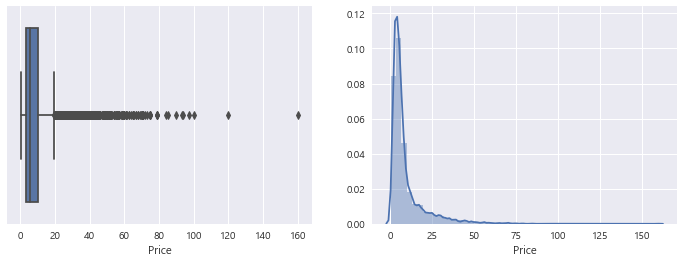

In [364]:
figure, (ax1,ax2) = plt.subplots(ncols = 2)
figure.set_size_inches(12,4)

sns.boxplot(df["Price"], ax = ax1)
sns.distplot(df["Price"], ax = ax2)

In [365]:
df["Price_log"] = np.log1p(df["Price"])
df = df.drop(["Price"], axis = 1)

C:\Users\jj950\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


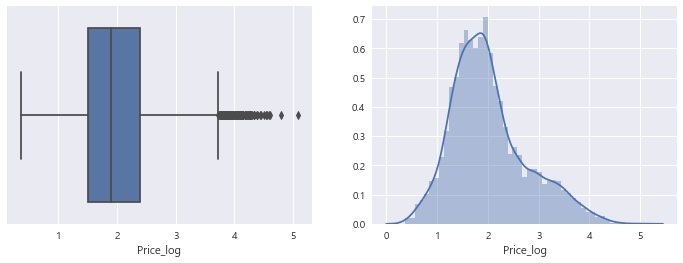

In [366]:
figure, (ax1,ax2) = plt.subplots(ncols = 2)
figure.set_size_inches(12,4)

sns.boxplot(df["Price_log"], ax = ax1)
sns.distplot(df["Price_log"], ax = ax2)

    mileage,Engine,Power 변수는 연속형 변수의 의미를 지닌다. 하지만 뒤에 단위가 붙음으로서 object로 인식하고 있다. 따라서 뒤의 단위를 제거하고 type을 연속형 데이터로 바꿔준다.

In [367]:
df['Mileage'] = df['Mileage'].apply(lambda x : x.split(' ')[0])
df['Engine'] = df['Engine'].apply(lambda x : x.split(' ')[0])
df['Power'] = df['Power'].apply(lambda x : x.split(' ')[0])

In [368]:
df = df.drop(df[df.Power == "null"].index)
df

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_log
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.011601
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,2.602690
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,1.704748
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,1.945910
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,2.930660
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74,5.0,1.749200
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71,5.0,1.609438
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112,8.0,1.360977
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5.0,1.294727


In [369]:
df = df.astype({'Mileage':float})
df = df.astype({'Engine':int})
df = df.astype({'Power':float})

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5871 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5871 non-null   int64  
 1   Name               5871 non-null   object 
 2   Location           5871 non-null   object 
 3   Year               5871 non-null   int64  
 4   Kilometers_Driven  5871 non-null   int64  
 5   Fuel_Type          5871 non-null   object 
 6   Transmission       5871 non-null   object 
 7   Owner_Type         5871 non-null   object 
 8   Mileage            5871 non-null   float64
 9   Engine             5871 non-null   int32  
 10  Power              5871 non-null   float64
 11  Seats              5871 non-null   float64
 12  Price_log          5871 non-null   float64
dtypes: float64(4), int32(1), int64(3), object(5)
memory usage: 619.2+ KB


    필요 없는 Unnamed: 0는 제거하도록 한다. 이후 범주형 데이터들은 더미변수로 만들어줘야한다. Transmission, Fuel_Type, Owner_Type은 더미변수로 만들어서 분석에 용이하게 한다.Name과 같은 경우, 브랜드 명만을 슬라이싱하여 더미변수로 만들어준다.

In [371]:
df = df.drop(["Unnamed: 0"], axis = 1)

In [372]:
dummy = pd.get_dummies(df.Transmission)
dummy.columns = ['Manual','Automatic']
df = pd.concat([df, dummy],axis = 1)
df = df.drop(["Transmission"], axis = 1)

In [373]:
dummy2 = pd.get_dummies(df.Fuel_Type)
dummy2.columns = ['Petrol','Diesel','CNG','LPG']
df = pd.concat([df, dummy2],axis = 1)
df = df.drop(["Fuel_Type"], axis =1)

In [374]:
dummy3 = pd.get_dummies(df.Owner_Type)
dummy3.columns = ['First','Second','Third','Fourth & Above']
df = pd.concat([df, dummy3],axis = 1)
df = df.drop(["Owner_Type"], axis = 1)

In [375]:
df['Name'] = df['Name'].apply(lambda x : x.split(' ')[0])
df

,Name,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log,Manual,Automatic,Petrol,Diesel,CNG,LPG,First,Second,Third,Fourth & Above
0,Maruti,Mumbai,2010,72000,26.60,998,58.16,5.0,1.011601,0,1,1,0,0,0,1,0,0,0
1,Hyundai,Pune,2015,41000,19.67,1582,126.20,5.0,2.602690,0,1,0,1,0,0,1,0,0,0
2,Honda,Chennai,2011,46000,18.20,1199,88.70,5.0,1.704748,0,1,0,0,0,1,1,0,0,0
3,Maruti,Chennai,2012,87000,20.77,1248,88.76,7.0,1.945910,0,1,0,1,0,0,1,0,0,0
4,Audi,Coimbatore,2013,40670,15.20,1968,140.80,5.0,2.930660,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,28.40,1248,74.00,5.0,1.749200,0,1,0,1,0,0,1,0,0,0
6015,Hyundai,Jaipur,2015,100000,24.40,1120,71.00,5.0,1.609438,0,1,0,1,0,0,1,0,0,0
6016,Mahindra,Jaipur,2012,55000,14.00,2498,112.00,8.0,1.360977,0,1,0,1,0,0,0,0,1,0
6017,Maruti,Kolkata,2013,46000,18.90,998,67.10,5.0,1.294727,0,1,0,0,0,1,1,0,0,0


In [376]:
dummy4 = pd.get_dummies(df.Name)
dummy4.columns = ['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini']
df = pd.concat([df, dummy4],axis = 1)
df = df.drop(["Name"], axis = 1)
df

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price_log,Manual,Automatic,...,Skoda,Mini,Fiat,Jeep,Ambassador,Isuzu,ISUZU,Force,Bentley,Lamborghini
0,Mumbai,2010,72000,26.60,998,58.16,5.0,1.011601,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Pune,2015,41000,19.67,1582,126.20,5.0,2.602690,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Chennai,2011,46000,18.20,1199,88.70,5.0,1.704748,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Chennai,2012,87000,20.77,1248,88.76,7.0,1.945910,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Coimbatore,2013,40670,15.20,1968,140.80,5.0,2.930660,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,28.40,1248,74.00,5.0,1.749200,0,1,...,0,0,0,0,0,0,0,0,0,0
6015,Jaipur,2015,100000,24.40,1120,71.00,5.0,1.609438,0,1,...,0,0,0,0,0,0,0,0,0,0
6016,Jaipur,2012,55000,14.00,2498,112.00,8.0,1.360977,0,1,...,0,0,0,0,0,0,0,0,0,0
6017,Kolkata,2013,46000,18.90,998,67.10,5.0,1.294727,0,1,...,0,0,0,0,0,0,0,0,0,0


    다시 한번 pairplot을 만들어보면 이전보다 훨씬 상관관계를 띈다는 것을 직감적으로 확인할 수 있다.

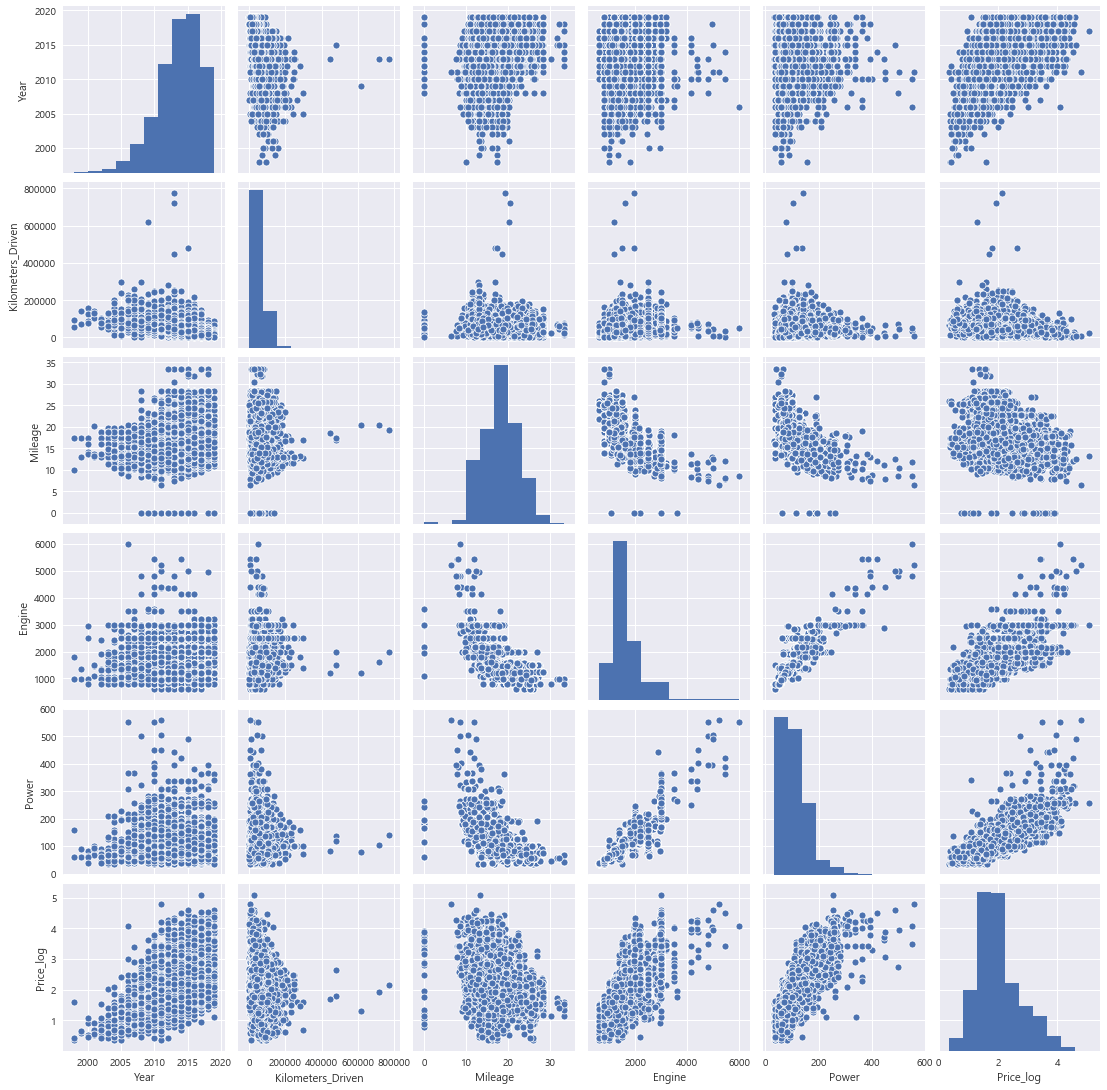

In [377]:
sns.pairplot(df[['Year','Kilometers_Driven','Mileage','Engine','Power','Price_log']])

In [378]:
# 여러변수를 log변환 했으나 정규화가 잘 된 것은 Power변수라고 판단하여 Power만 log변환을 시도했다.
df["Power_log"] = np.log1p(df["Power"])
df = df.drop(["Power"], axis = 1)

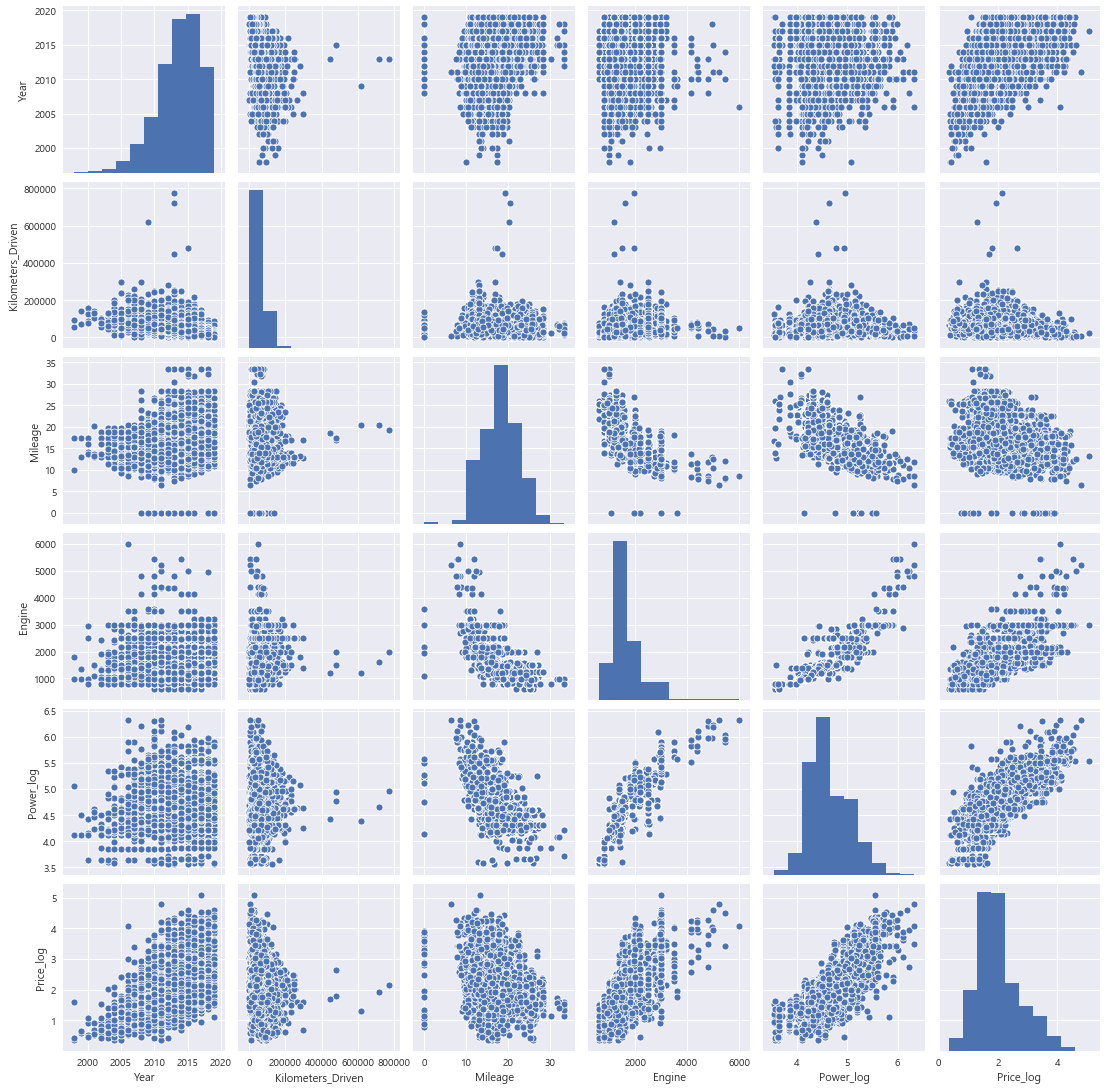

In [295]:
sns.pairplot(df[['Year','Kilometers_Driven','Mileage','Engine','Power_log','Price_log']])

    앞으로 사용할 독립변수를 X로 반응변수는 y로 설정한다. 우선 독립변수들끼리의 상관계수를 확인해본다.

In [296]:
X = df.drop(['Price_log','Location'],axis = 1)
y = df['Price_log']

In [297]:
X.corr()

,Year,Kilometers_Driven,Mileage,Engine,Seats,Manual,Automatic,Petrol,Diesel,CNG,...,Mini,Fiat,Jeep,Ambassador,Isuzu,ISUZU,Force,Bentley,Lamborghini,Power_log
Year,1.000000,-0.445758,2.857604e-01,-0.068513,0.007901,0.085136,-0.085136,0.021099,0.109535,-0.034947,...,-0.050824,-0.008133,0.001411,0.069305,-0.061306,0.003002,-0.031619,0.003396,-0.003624,0.038669
Kilometers_Driven,-0.445758,1.000000,-1.325637e-01,0.161086,0.212992,-0.104350,0.104350,-0.006653,0.233423,0.003004,...,0.045052,0.025593,-0.018400,-0.018249,0.051493,0.046497,0.186023,0.000160,0.021132,0.029783
Mileage,0.285760,-0.132564,1.000000e+00,-0.637349,-0.331619,-0.368343,0.368343,0.162453,0.097655,0.010472,...,-0.096022,0.034026,-0.050272,0.088451,-0.059730,0.068428,-0.252622,0.002113,-0.038221,-0.559545
Engine,-0.068513,0.161086,-6.373485e-01,1.000000,0.401433,0.501647,-0.501647,-0.086410,0.430012,-0.041082,...,0.103043,-0.035892,0.161649,-0.083399,0.046456,-0.082749,0.320554,-0.073136,0.053274,0.855487
Seats,0.007901,0.212992,-3.316190e-01,0.401433,1.000000,-0.074476,0.074476,-0.029884,0.309663,-0.014559,...,0.066725,-0.040267,-0.063067,-0.047911,-0.061234,-0.023046,0.419564,-0.086607,-0.006943,0.164732
Manual,0.085136,-0.104350,-3.683430e-01,0.501647,-0.074476,1.000000,-1.000000,-0.062109,0.139349,-0.026381,...,-0.010115,-0.045437,0.081849,-0.058088,0.096112,-0.090792,-0.024240,-0.053360,0.087520,0.635326
Automatic,-0.085136,0.104350,3.683430e-01,-0.501647,0.074476,-1.000000,1.000000,0.062109,-0.139349,0.026381,...,0.010115,0.045437,-0.081849,0.058088,-0.096112,0.090792,0.024240,0.053360,-0.087520,-0.635326
Petrol,0.021099,-0.006653,1.624530e-01,-0.086410,-0.029884,-0.062109,0.062109,1.000000,-0.104667,-0.004017,...,-0.006610,-0.012065,-0.005084,-0.015475,-0.016894,0.002906,-0.019016,-0.023116,-0.005826,-0.115709
Diesel,0.109535,0.233423,9.765509e-02,0.430012,0.309663,0.139349,-0.139349,-0.104667,1.000000,-0.044458,...,0.037909,0.020221,0.015808,0.040007,0.003416,0.031023,0.118138,-0.002316,0.055666,0.340628
CNG,-0.034947,0.003004,1.047205e-02,-0.041082,-0.014559,-0.026381,0.026381,-0.004017,-0.044458,1.000000,...,-0.002808,-0.005125,-0.002159,-0.006573,-0.007176,-0.007409,-0.011079,-0.009819,-0.002475,-0.054120


    많아서 보기 힘들지만 확대해보면 일부 변수들이 굉장히 높은 상관관계를 띄는 것을 확인할 수 있다. 특히 더미변수들끼리 큰 상관관계를 띄는데 이는 파이썬 dummy함수의 특성상 디폴트 값을 만들지 않고 범주의 개수만큼 변수를 만들기 때문이다. 이를 제외하고도 상관관계가 높은 변수들이 존재함을 알 수 있다.

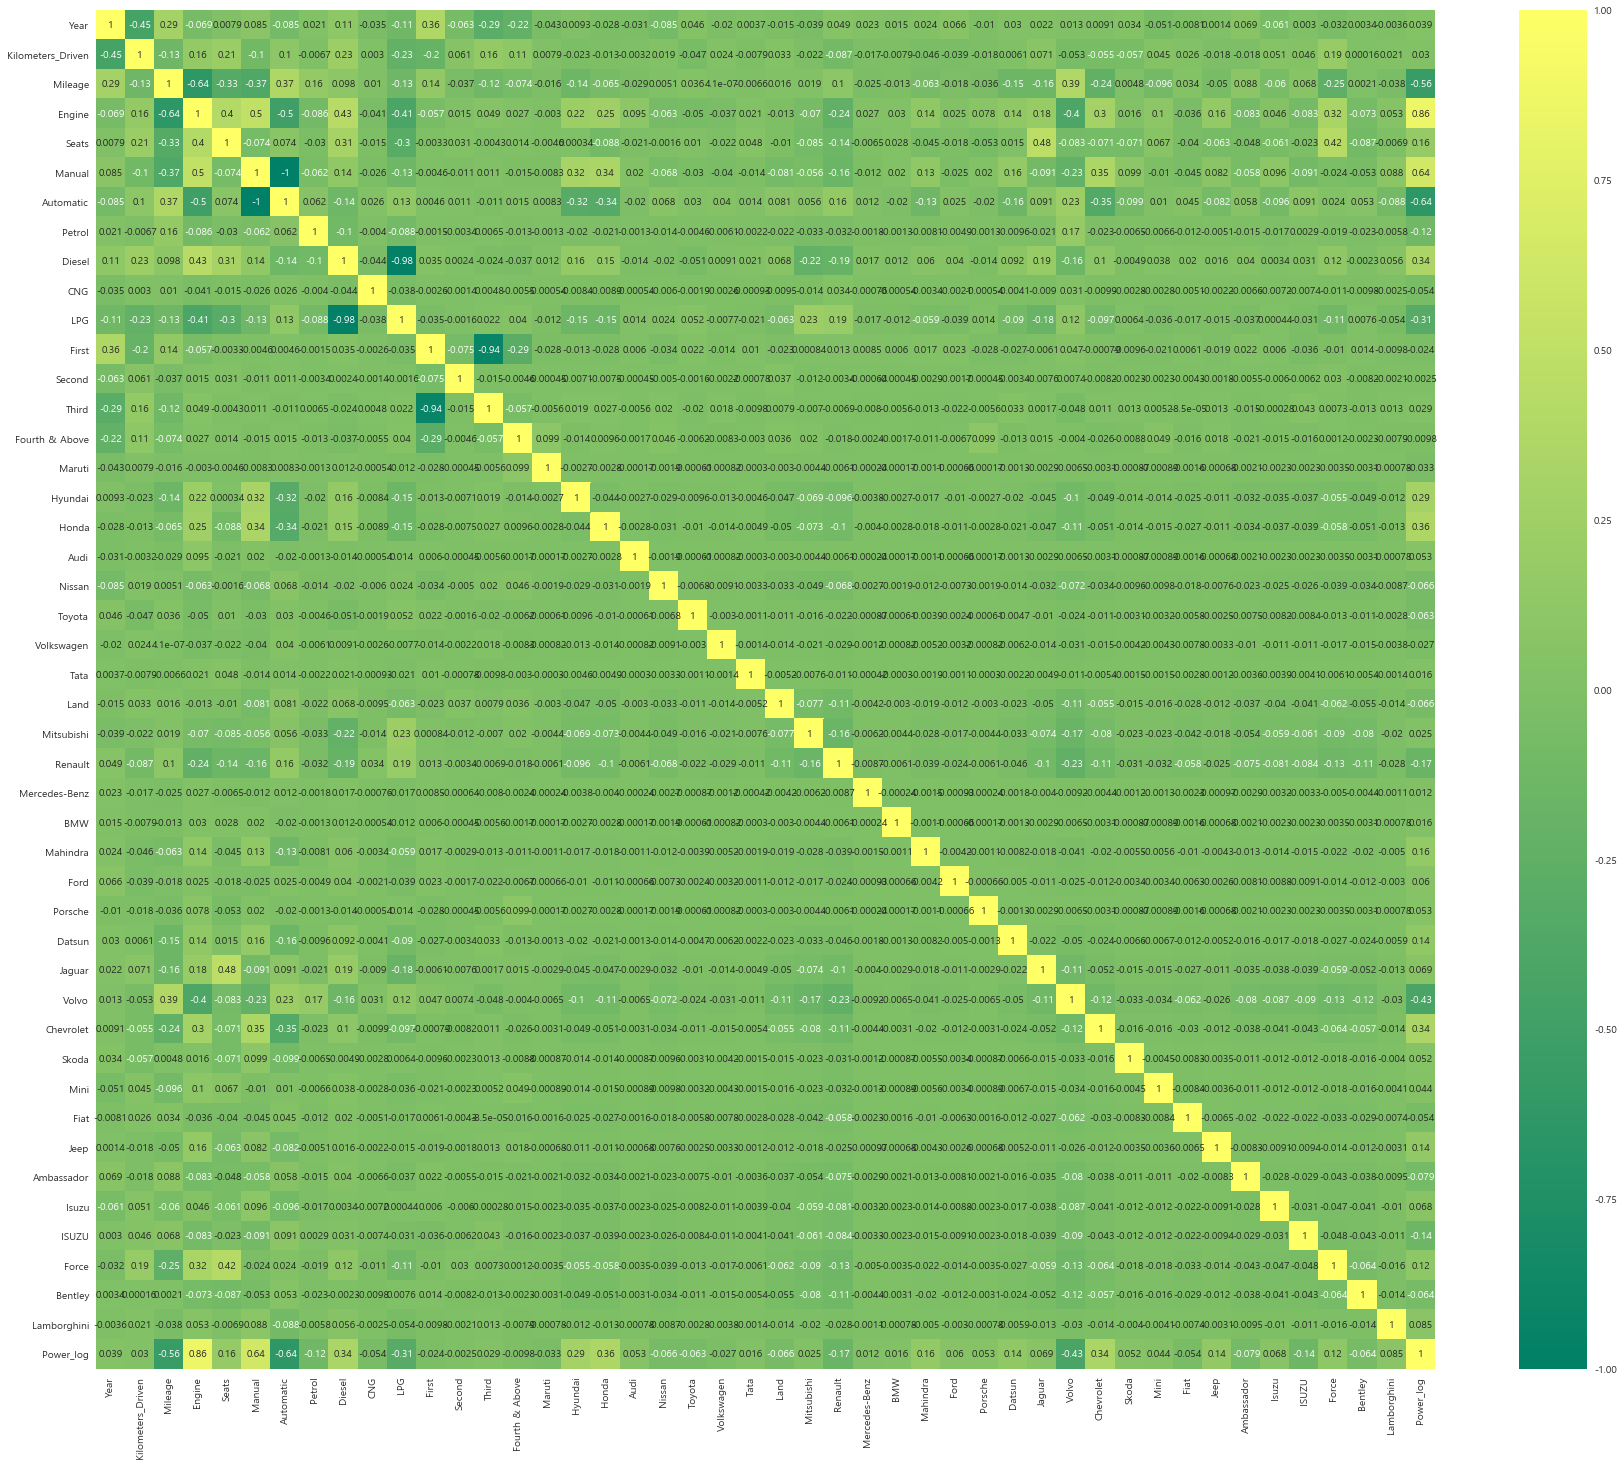

In [298]:
plt.figure(figsize = (30,25))
sns.heatmap(X.corr(), cmap = "summer", annot = True)

    그래프와 수치를 바탕으로 다중공선성이 있을 것으로 예측하여, 이를 판단하기로 한다. 아래는 VIF값을 데이터프레임화 한 것들이다. 가장 위의 변수들부터 하나하나 빼보기로 한다.

In [300]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

C:\Users\jj950\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
23,inf,Land
21,inf,Volkswagen
42,inf,Force
24,inf,Mitsubishi
25,inf,Renault
26,inf,Mercedes-Benz
27,inf,BMW
28,inf,Mahindra
29,inf,Ford
30,inf,Porsche


In [301]:
X2 = X.drop(['Land'],axis = 1)

In [302]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
vif.sort_values(["VIF Factor"], ascending=[False])

C:\Users\jj950\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
11,inf,First
12,inf,Second
14,inf,Fourth & Above
13,inf,Third
5,inf,Manual
6,inf,Automatic
7,inf,Petrol
8,inf,Diesel
9,inf,CNG
10,inf,LPG


In [303]:
X3 = X2.drop(['First'],axis = 1)

In [304]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif["features"] = X3.columns
vif.sort_values(["VIF Factor"], ascending=[False])

C:\Users\jj950\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
5,inf,Manual
6,inf,Automatic
7,inf,Petrol
8,inf,Diesel
9,inf,CNG
10,inf,LPG
3,8.028272,Engine
43,7.003278,Power_log
31,4.446049,Volvo
23,3.998805,Renault


In [305]:
X4 = X3.drop(['Manual'],axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif["features"] = X4.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
7,381763.643539,Diesel
9,321614.839952,LPG
6,6663.517295,Petrol
8,1210.559306,CNG
3,8.028272,Engine
42,7.003278,Power_log
30,4.446049,Volvo
22,3.998805,Renault
2,3.588568,Mileage
21,3.027006,Mitsubishi


In [306]:
X5 = X4.drop(['Diesel'],axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif["features"] = X5.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
0,991.502546,Year
41,870.780041,Power_log
4,106.964812,Seats
3,66.166403,Engine
2,61.419213,Mileage
5,7.744072,Automatic
29,5.537348,Volvo
21,4.876224,Renault
8,4.568154,LPG
1,4.116449,Kilometers_Driven


In [307]:
X6 = X5.drop(['Year'],axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif["features"] = X6.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
40,274.527282,Power_log
3,87.016334,Seats
2,58.946769,Engine
1,46.411445,Mileage
4,7.319166,Automatic
28,5.521289,Volvo
20,4.875817,Renault
0,4.028320,Kilometers_Driven
7,3.830172,LPG
19,3.316419,Mitsubishi


In [308]:
X7 = X6.drop(['Power_log'],axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X7.values, i) for i in range(X7.shape[1])]
vif["features"] = X7.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
3,64.122850,Seats
2,28.801665,Engine
1,23.767866,Mileage
4,7.319097,Automatic
28,5.479831,Volvo
20,4.605165,Renault
0,3.993645,Kilometers_Driven
19,3.175561,Mitsubishi
37,2.808568,Force
7,2.639257,LPG


In [309]:
X8 = X7.drop(['Seats'],axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X8.values, i) for i in range(X8.shape[1])]
vif["features"] = X8.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
1,17.578215,Mileage
2,14.275972,Engine
3,7.033047,Automatic
27,5.195708,Volvo
19,4.439952,Renault
0,3.930766,Kilometers_Driven
18,3.131458,Mitsubishi
36,2.583361,Force
6,2.459847,LPG
28,2.440672,Chevrolet


In [310]:
X9 = X8.drop(['Mileage'],axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X9.values, i) for i in range(X9.shape[1])]
vif["features"] = X9.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
1,13.401678,Engine
2,5.610873,Automatic
0,3.929469,Kilometers_Driven
26,3.280102,Volvo
18,3.227967,Renault
35,2.528080,Force
17,2.492476,Mitsubishi
5,2.400442,LPG
27,2.259028,Chevrolet
11,1.985609,Honda


In [311]:
X10 = X9.drop(['Engine'],axis = 1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X10.values, i) for i in range(X10.shape[1])]
vif["features"] = X10.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
1,5.455885,Automatic
0,3.618495,Kilometers_Driven
25,2.764795,Volvo
17,2.505466,Renault
4,2.398205,LPG
16,1.905258,Mitsubishi
34,1.497226,Force
35,1.373260,Bentley
24,1.328507,Jaguar
33,1.266148,ISUZU


    총 9개의 변수를 제거하고 나서야 다중공선성을 처리했다. 이 중 더미변수를 생성했던 묶음 중에 하나씩이 빠진 것으로 파악된다. 의외인 점은 예상외로 몇 없는 연속변수들이 많이 제거된 것으로 보인다.

    아래는 반응변수와의 상관성을 파악하기 위해 만든 것이다. Price_log에 꽤나 큰 영향을 미치는 변수들이 있음을 확인할 수 있다.

In [312]:
df.corr()['Price_log'].sort_values(ascending=False)

Price_log            1.000000
Power_log            0.799577
Engine               0.701368
Manual               0.633014
Year                 0.456466
Diesel               0.427895
Chevrolet            0.366675
Honda                0.316076
Hyundai              0.314716
Datsun               0.204452
Mahindra             0.171192
Seats                0.159256
First                0.155339
Force                0.132952
Jeep                 0.119948
Skoda                0.114256
Lamborghini          0.073106
Ford                 0.064239
Porsche              0.048559
Audi                 0.036226
Mini                 0.025537
Jaguar               0.025505
BMW                  0.017769
Mercedes-Benz        0.012034
Tata                 0.008708
Isuzu               -0.007677
Maruti              -0.020737
Second              -0.025788
Ambassador          -0.037063
Toyota              -0.040725
CNG                 -0.044599
Volkswagen          -0.049895
Fiat                -0.054316
Land      

## Modeling

    위의 전처리를 바탕으로 모델링을 진행하려고 한다. 기본 설정은 아래와 같다.
   

In [313]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [314]:
#train과 test를 분할할 하는 과정으로 발표자를 따라 0.2로 설정했다.
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [315]:
#모델 불러오기
model = LinearRegression()
#train 데이터에 모델 fit 진행
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [316]:
# 예측값 설정
pred = model.predict(X_train)

    위의 모델링을 바탕으로 R_square값과 mse값을 구하면 아래와 같다. R_square값이 굉장히 높은 것을 알 수 있다. 동시에 mse값은 굉장히 작은 것을 알 수 있다.
    
    각 베타 값들을 구했을 때, 수치가 굉장히 작음을 확인할 수 있다. 이를 test 데이터에 진행했을 때도 비슷한 결과임을 알 수 있다.

In [317]:
model.score(X_train, y_train)

0.9240346142740624

In [318]:
mean_squared_error(y_train, pred)

0.04151375871422063

In [319]:
print(model.coef_)
print(model.intercept_)

[ 9.81902865e-02 -6.48751905e-07 -1.04589926e-02  1.46913503e-04
  3.11022766e-02  4.81735860e-02 -4.81735860e-02 -4.97948106e-02
  1.08902900e-01  1.62499375e-02 -7.53580271e-02  2.22588271e-02
  2.62973529e-02 -1.88947308e-02 -2.96614492e-02  5.96747931e-01
  5.90855428e-01  5.82820643e-01 -2.22044605e-16 -2.19800281e-01
 -2.59964171e-01 -1.76326645e-01 -1.75050842e-01 -1.71787300e-02
  1.90441327e-02 -5.55111512e-16 -4.44089210e-16  7.59971692e-01
  2.14418886e-01  1.56254317e+00  8.69685163e-01 -1.23213240e-01
  7.08757713e-02  6.11053491e-01  9.61740521e-01  2.36253629e-01
 -2.53065185e-02  9.10459056e-01 -4.29652001e-03  5.16452068e-02
 -2.68145838e-01  2.06664146e-01 -3.12484109e-02  4.31563900e-01
  6.26141260e-01]
-198.88946033548604


In [320]:
model.score(X_test,y_test)

0.9083028809579833

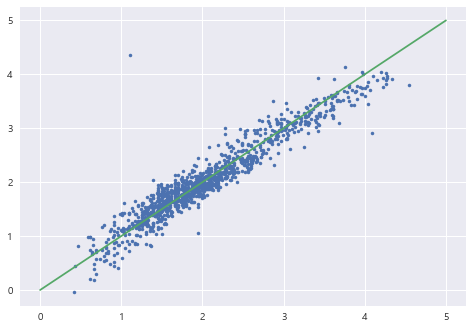

In [321]:
plt.plot(y_test, model.predict(X_test),'.')

x=np.linspace(0,5,5)
y=x
plt.plot(x,y)
plt.show()

    실제와 예측이 비슷하면 해당 라인에 분포한다고 한다. 위의 그래프를 보면 굉장히 붙어있음을 확인할 수 있다. 또한 멀리 이상치의 값도 존재함을 알 수 있다.

## statsmodel OLS 방식

In [325]:
import statsmodels.api as sm

    위에서 다중공선성으로 의심되던 변수들은 우선 빼주고 분석하기로 한다.

In [335]:
df2 = df.drop(['Land','First','Manual','Diesel','Year','Power_log','Seats','Mileage','Engine','Location'],axis=1)
df2.columns

Index(['Kilometers_Driven', 'Price_log', 'Automatic', 'Petrol', 'CNG', 'LPG',
       'Second', 'Third', 'Fourth & Above', 'Maruti', 'Hyundai', 'Honda',
       'Audi', 'Nissan', 'Toyota', 'Volkswagen', 'Tata', 'Mitsubishi',
       'Renault', 'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche',
       'Datsun', 'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat',
       'Jeep', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'],
      dtype='object')

In [336]:
X3 = df2.drop(["Price_log"],axis=1)
y3 = df2.Price_log

In [337]:
model = sm.OLS(y3,X3)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price_log   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              1895.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        18:41:23   Log-Likelihood:                         -5332.3
No. Observations:                5871   AIC:                                  1.074e+04
Df Residuals:                    5834   BIC:                                  1.099e+04
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

    우선 R_square값과 adjusted_R_square값이 매우 높음을 확인할 수 있다. 동시에 F값 역시 매우 높아 모델이 유의함을 파악할 수 있다. 하지만 log-likelihood값이 너무 낮고 AIC,BIC값이 너무 높은 것을 확인 할 수 있다. 또한 p-value의 값이 높아 유의하지 않은 변수들이 존재함을 알 수 있다. 마지막으로 다중공선성 확인으로 변수를 제거했음에도 불구하고 여전히 다중공선성이 존재한다고 나와있다.
   

## Backward 방식

    Backward 방식으로 p-value가 큰 변수부터 차근차근 제거해보자.

In [338]:
# p-value 값이 큰 age 변수 제거해보기 
X4 = X3.drop(["Second"], axis=1)
y4 = df2.Price_log

In [339]:
model = sm.OLS(y4, X4)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price_log   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              1948.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        18:47:20   Log-Likelihood:                         -5332.3
No. Observations:                5871   AIC:                                  1.074e+04
Df Residuals:                    5835   BIC:                                  1.098e+04
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [342]:
X5 = X4.drop(["Kilometers_Driven"], axis=1)
y5 = df2.Price_log

model = sm.OLS(y5, X5)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price_log   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              2004.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        18:50:15   Log-Likelihood:                         -5332.7
No. Observations:                5871   AIC:                                  1.074e+04
Df Residuals:                    5836   BIC:                                  1.097e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [343]:
X6 = X5.drop(["Maruti"], axis=1)
y6 = df2.Price_log

model = sm.OLS(y6, X6)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:              Price_log   R-squared (uncentered):                   0.923
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              2062.
Date:                Tue, 04 Aug 2020   Prob (F-statistic):                        0.00
Time:                        18:50:23   Log-Likelihood:                         -5333.9
No. Observations:                5871   AIC:                                  1.074e+04
Df Residuals:                    5837   BIC:                                  1.096e+04
Df Model:                          34                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

    세 개의 변수를 제거하자 p-value값은 안정화 됐고, 다중공선성 문제도 없어졌다. 하지만 여전히 AIC,BIC 값은 높아보이며, log_likelihood 값은 너무 작은 편이다. 또한 이 데이터가 사회적인 데이터임에도 불구하고 R_square가 예상보다 너무 높게 나왔다. 0.3 정도면 높은 편에 속하는 편인데 0.9가 넘는 것이 마냥 긍정적으로 보이지만은 않는다. overfitting으로 인한 결과라고 조심스럽게 추측해본다.
   

# 가정 검토

    우선 잔차를 구해보도록 하자

In [344]:
import scipy.stats

In [345]:
pred = result.predict()

In [346]:
residual = df['Price_log'] - pred

In [347]:
sr = scipy.stats.zscore(residual)
(x,y),_ = scipy.stats.probplot(sr)

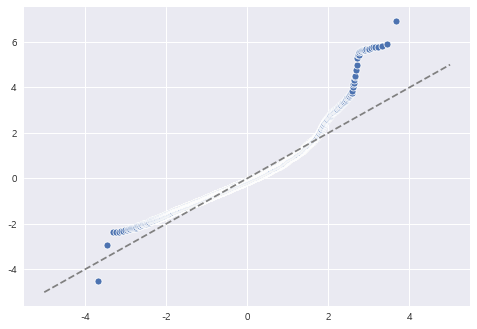

In [351]:
sns.scatterplot(x,y)
plt.plot([-5,5],[-5,5], '--', color = 'grey')

    정규성을 확인하기 위해 잔차그래프를 그렸다. 처음에는 라인에 붙어있는 듯 하나 끝으로 갈수록 직선에서 멀어졌다는 것을 확인할 수 있다. 정규성을 만족했다고 보기는 어려워보인다.

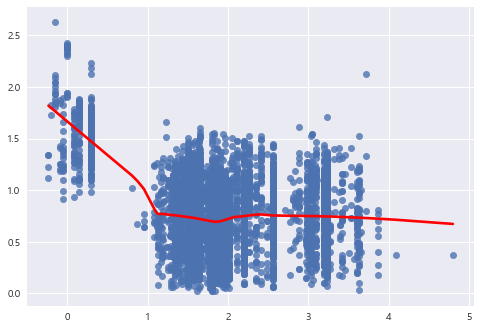

In [349]:
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

    등분산성을 확인하기 위하여 위와 같은 그래프를 그렸다. 직선 우측의 경우 직선이 잘 이루어진 것으로 확인되나 좌측의 경우 매우 급격하게 꺾여있음이 파악된다. 즉, 정규성과 마찬가지로 등분산성도 깨져있음을 알 수 있다. 
    
    전반적으로 모델을 평가하자면 좋은 모델이라고 할 수 없다. 등분산성, 정규성이 깨져있으며 AIC,BIC 값은 너무 높고, log_likelihood도 너무 낮다. 반면 R_square 값이나, 다중공선성이 없는 점, 변수들의 p-value 값은 낮다는 점은 이상적이다. 그러나 사회데이터임을 바탕으로 보자면 R_square가 마냥 높은게 좋아보이지는 않는다.